In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

#import re
# import dash
# import dash_core_components as dcc
# import dash_html_components as html

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations=pd.read_pickle('donations_cohort_with_cycle.pkl')

In [3]:
for col in donations.columns:
    print(col)

id
first_gift_year
lapsed_count
recovered_count
max_consec_giving_years
total_giving_years
count_2013
count_2014
count_2015
count_2016
count_2017
count_yr0
count_yr1
count_yr2
count_yr3
count_yr4
initial
first_gift
second_year
second_with_gap
multi_year
key_multi_year
recovered_multi_year
inconsistent_multi_year 
recovered_key_multi_year
lapsed_after_first
lapsed_after_first_long
lapsed_after_second
lapsed_multi_year
lapsed_long_multi_year
lapsed_key_multi_year
lapsed_long
cohort_0_first_gift
cohort_1_lapsed_after_first
cohort_1_second_year
cohort_2_lapsed_after_first_long
cohort_2_lapsed_after_second
cohort_2_multi_year
cohort_2_second_with_gap
cohort_3_first_gift
cohort_3_inconsistent_multi_year
cohort_3_key_multi_year
cohort_3_lapsed_after_second
cohort_3_lapsed_long
cohort_3_lapsed_multi_year
cohort_4_first_gift
cohort_4_inconsistent_multi_year
cohort_4_key_multi_year
cohort_4_lapsed_after_first
cohort_4_lapsed_key_multi_year
cohort_4_lapsed_long
cohort_4_lapsed_long_multi_year
coh

In [85]:
#group by TF columns and sum amount donated by the 16 groups
# create new column showing percentage of total amount
sun_amount=donations.groupby(['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF']).sum()['amount_total'].reset_index()
sun_amount['perc_amount_total']= sun_amount['amount_total']/sun_amount['amount_total'].sum()

In [86]:
#group by TF columns and sum amount donated by the 16 groups
sun_count=donations.groupby(['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF']).count()['id'].reset_index()
sun_count['perc_cohort_donors']= sun_count['id']/sun_count['id'].sum()

In [222]:
sun_count.to_csv('sun_count.csv')

In [139]:
fig = px.treemap(sun_count, path=['yr0', 'yr1', 'yr2', 'yr3', 'yr4'], values='perc_cohort_donors',
                marker_colors = ["pink", "royalblue", "lightgray", "purple", "cyan", "lightgray", "lightblue"])
fig.show()

TypeError: treemap() got an unexpected keyword argument 'marker_colors'

In [111]:
fig = px.sunburst(sun_amount, path=['cohort_yr4_TF', 'cohort_yr3_TF', 'cohort_yr2_TF', 'cohort_yr1_TF', 'cohort_yr0_TF'], 
                  values='perc_amount_total',
                  color='cohort_yr3_TF',
                #  color_discrete_map={'TT':'black', 'TF':'gold'}
                 )
fig.show()

In [90]:
fig = px.sunburst(sun_count, path=['cohort_yr4_TF', 'cohort_yr3_TF', 'cohort_yr2_TF', 'cohort_yr1_TF', 'cohort_yr0_TF'], values='perc_cohort_donors', 
                  #color='cohort_yr1_TF'
                 )
fig.show()

In [146]:
fig['data'][0]

Sunburst({
    'branchvalues': 'total',
    'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
    'hovertemplate': ('labels=%{label}<br>perc_cohort' ... 'nt}<br>id=%{id}<extra></extra>'),
    'ids': array(['F/F/F/F/T', 'T/F/F/F/T', 'F/T/F/F/T', 'T/T/F/F/T', 'F/F/T/F/T',
                  'T/F/T/F/T', 'F/T/T/F/T', 'T/T/T/F/T', 'F/F/F/T/T', 'T/F/F/T/T',
                  'F/T/F/T/T', 'T/T/F/T/T', 'F/F/T/T/T', 'T/F/T/T/T', 'F/T/T/T/T',
                  'T/T/T/T/T', 'F/F/F/F', 'T/F/F/F', 'F/T/F/F', 'T/T/F/F', 'F/F/T/F',
                  'T/F/T/F', 'F/T/T/F', 'T/T/T/F', 'F/F/F/T', 'T/F/F/T', 'F/T/F/T',
                  'T/T/F/T', 'F/F/T/T', 'T/F/T/T', 'F/T/T/T', 'T/T/T/T', 'F/F/F', 'T/F/F',
                  'F/T/F', 'T/T/F', 'F/F/T', 'T/F/T', 'F/T/T', 'T/T/T', 'F/F', 'T/F',
                  'F/T', 'T/T', 'F', 'T'], dtype=object),
    'labels': array(['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
                     'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 

In [207]:
fig = px.sunburst(sun_count, path=['yr0', 'yr1', 'yr2', 'yr3', 'yr4'], values='perc_cohort_donors')
                
fig2 = go.Figure(go.Treemap(
                branchvalues="total",
                ids=fig['data'][0]['ids'],
                labels=fig['data'][0]['labels'].tolist(),
                parents=fig['data'][0]['parents'].tolist(),
                values=fig['data'][0]['values'],
                textinfo = "label+value+percent parent+percent entry+percent root",
            #    marker_colors = ["green", "red", "green", "green","green", "red", "red", "green","green", "red", "green", "green","green", "red", "red", "green"
                    #            ],
                pathbar = {"visible": True},
                maxdepth=5
                            )
                )
fig2.show()

In [221]:
sun_count.values

array([['T', 'TF', 'TFF', 'TFFF', 'TFFFF', 1696680, 0.8380512448667706,
        'T', 'F', 'F', 'F', 'F'],
       ['T', 'TF', 'TFF', 'TFFF', 'TFFFT', 6912, 0.003414085275077869,
        'T', 'F', 'F', 'F', 'T'],
       ['T', 'TF', 'TFF', 'TFFT', 'TFFTF', 17619, 0.008702657474189378,
        'T', 'F', 'F', 'T', 'F'],
       ['T', 'TF', 'TFF', 'TFFT', 'TFFTT', 3108, 0.0015351529275089723,
        'T', 'F', 'F', 'T', 'T'],
       ['T', 'TF', 'TFT', 'TFTF', 'TFTFF', 44403, 0.02193223791511612,
        'T', 'F', 'T', 'F', 'F'],
       ['T', 'TF', 'TFT', 'TFTF', 'TFTFT', 2035, 0.001005159654916589,
        'T', 'F', 'T', 'F', 'T'],
       ['T', 'TF', 'TFT', 'TFTT', 'TFTTF', 7626, 0.0037667555422083087,
        'T', 'F', 'T', 'T', 'F'],
       ['T', 'TF', 'TFT', 'TFTT', 'TFTTT', 2735, 0.0013509148187699613,
        'T', 'F', 'T', 'T', 'T'],
       ['T', 'TT', 'TTF', 'TTFF', 'TTFFF', 162004, 0.080019599378431,
        'T', 'T', 'F', 'F', 'F'],
       ['T', 'TT', 'TTF', 'TTFF', 'TTFFT', 2994, 0.

In [215]:
df=sun_count
fig = px.sunburst(df, path=['yr0', 'yr1', 'yr2', 'yr3', 'yr4'], values='perc_cohort_donors')
                
fig2 = go.Figure(go.Treemap(
                branchvalues="total",
               # ids=df.ids,
                labels=df.labels,
                parents=df.parents,
                values=df.values,
                textinfo = "label+value+percent parent+percent entry+percent root",
            #    marker_colors = ["green", "red", "green", "green","green", "red", "red", "green","green", "red", "green", "green","green", "red", "red", "green"
                    #            ],
                pathbar = {"visible": True},
                maxdepth=5
                            )
                )
fig2.show()

AttributeError: 'DataFrame' object has no attribute 'labels'

In [136]:
fig = px.sunburst(sun_count, path=['yr0', 'yr1', 'yr2', 'yr3', 'yr4'], values='perc_cohort_donors', 
                  color='cohort_yr4_TF'
                 )
fig.show()

In [116]:
fig = px.sunburst(sun_amount, path=['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF'], values='perc_amount_total', 
                  #color='cohort_yr1_TF'
                 )
fig.show()

In [115]:
fig = px.sunburst(sun_count, path=['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF'], values='perc_cohort_donors', 
                  #color='cohort_yr1_TF'
                 )
fig.show()

In [46]:
sun2=donations.groupby(['cohort_yr4_TF', 'cohort_yr3_TF', 'cohort_yr2_TF', 'cohort_yr1_TF', 'cohort_yr0_TF']).count()['id'].reset_index()

In [143]:
fig =go.Figure(go.Sunburst(
 ids=["T", "TT", "TF", "TTT", "TTF", 'TFT', 'TFF'],
  labels= ["T", "T", "F", "T", "F", "T", "F"],
  parents=["", "T", "T", "TT", "TT", "TF", "TF"],  marker_colors = ["green", "green", "red", "green", "red", "green", "red"])
)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [45]:
fig =go.Figure(go.Sunburst(
 ids=[
    "North America", "Europe", "Australia", "North America - Football", "Soccer",
    "North America - Rugby", "Europe - Football", "Rugby",
    "Europe - American Football","Australia - Football", "Association",
    "Australian Rules", "Autstralia - American Football", "Australia - Rugby",
    "Rugby League", "Rugby Union"
  ],
  labels= [
    "North<br>America", "Europe", "Australia", "Football", "Soccer", "Rugby",
    "Football", "Rugby", "American<br>Football", "Football", "Association",
    "Australian<br>Rules", "American<br>Football", "Rugby", "Rugby<br>League",
    "Rugby<br>Union"
  ],
  parents=[
    "", "", "", "North America", "North America", "North America", "Europe",
    "Europe", "Europe","Australia", "Australia - Football", "Australia - Football",
    "Australia - Football", "Australia - Football", "Australia - Rugby",
    "Australia - Rugby"
  ],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [142]:
# #this works but takes a long time because dataset is big
# fig = px.sunburst(donations, path=['cohort_yr0_TF', 'cohort_yr1_TF','cohort_yr2_TF', 'cohort_yr3_TF','cohort_yr4_TF'], values='amount_total', color='cohort_yr0_TF')
# fig.show()

In [33]:
df['amount_yr1'].sum()

46336245.720000006

In [10]:
df['amount_total'].describe().round(0)

count    2024554.0
mean         127.0
std         2219.0
min            0.0
25%           25.0
50%           50.0
75%          100.0
max      1836958.0
Name: amount_total, dtype: float64

In [13]:
df.groupby('cohort').count()['id'].round(0)

cohort
0              141
cohort13    320069
cohort14    320673
cohort15    355137
cohort16    445598
cohort17    434991
cohort18    147945
Name: id, dtype: int64

C:\Users\erinm\Anaconda3\lib\site-packages\seaborn\distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


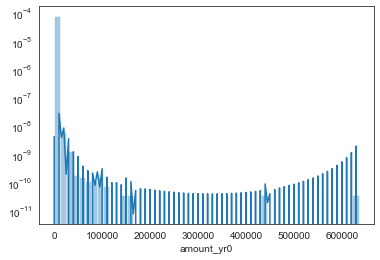

In [17]:
sns.distplot(df['amount_yr0'], bins=50, hist_kws={'log':True});

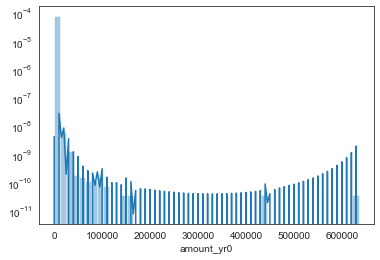

In [19]:
ax=sns.distplot(df['amount_yr0'], bins=50);
ax.set_yscale('log')

In [ ]:
# df.corr()
# time.sleep(10)

In [29]:
df['amount_yr0'].quantile([.25, .5])

0.25    25.0
0.50    49.0
Name: amount_yr0, dtype: float64

In [37]:
df['amount_yr4'].quantile([.25, 1])

0.25         0.00
1.00    254645.17
Name: amount_yr4, dtype: float64

In [50]:
df[['cohort', 'first_gift']].groupby(['cohort'], as_index=False).mean().sort_values(by='first_gift', ascending=False)


,cohort,first_gift
6,cohort18,1.000000
3,cohort15,0.009954
2,cohort14,0.008417
1,cohort13,0.007611
0,0,0.007092
4,cohort16,0.000000
5,cohort17,0.000000


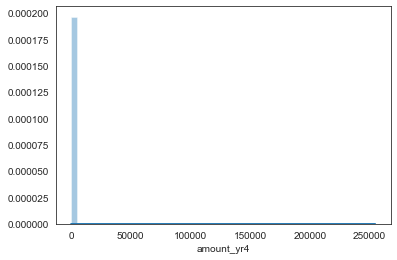

In [39]:
ax=sns.distplot(df['amount_yr4'], bins=50);
#ax.set_yscale('log')

In [23]:
pd.cut(df['amount_yr0'], 50).value_counts().sort_index()

(-634.7, 12694.209]         2024338
(12694.209, 25388.408]          157
(25388.408, 38082.608]           34
(38082.608, 50776.807]            5
(50776.807, 63471.006]            4
(63471.006, 76165.205]            3
(76165.205, 88859.404]            3
(88859.404, 101553.604]           4
(101553.604, 114247.803]          2
(114247.803, 126942.002]          0
(126942.002, 139636.201]          0
(139636.201, 152330.4]            1
(152330.4, 165024.6]              1
(165024.6, 177718.799]            0
(177718.799, 190412.998]          0
(190412.998, 203107.197]          0
(203107.197, 215801.396]          0
(215801.396, 228495.596]          0
(228495.596, 241189.795]          0
(241189.795, 253883.994]          0
(253883.994, 266578.193]          0
(266578.193, 279272.392]          0
(279272.392, 291966.592]          0
(291966.592, 304660.791]          0
(304660.791, 317354.99]           0
(317354.99, 330049.189]           0
(330049.189, 342743.388]          0
(342743.388, 355437.588]    

In [51]:
df.groupby('amount_yr0').count()['id']

amount_yr0
0.01         1
0.06         1
0.10         3
0.20         2
0.40         1
            ..
113360.94    1
147548.22    1
163192.85    1
442794.38    1
634709.97    1
Name: id, Length: 63641, dtype: int64

In [72]:
df.amount_yr0.value_counts()

25.00      473938
50.00      419025
100.00     178299
10.00      175615
20.00      139023
            ...  
1049.64         1
317.97          1
213.57          1
711.39          1
341.20          1
Name: amount_yr0, Length: 63641, dtype: int64

In [118]:
print(f'amount_yr0')
print(f'number donors overall: ', df.count()['id'])

print(f'number donors under $10: ', df.query('amount_yr0 <= 10').count()['id'])
print(f'% donors under $10: ', df.query('amount_yr0 <= 10').count()['id']/df.count()['id']*100)

print(f'number donors under $50: ', df.query('amount_yr0 <= 50').count()['id'])
print(f'% donors under $50: ', df.query('amount_yr0 <= 50').count()['id']/df.count()['id']*100)

print(f'number donors under $100: ', df.query('amount_yr0 <= 100').count()['id'])
print(f'% donors under $100: ', df.query('amount_yr0 <= 100').count()['id']/df.count()['id']*100)

print(f'number donors under $1000: ', df.query('amount_yr0 <= 1000').count()['id'])
print(f'% donors under $1000: ', df.query('amount_yr0 <= 1000').count()['id']/df.count()['id']*100)

amount_yr0
number donors overall:  2024554
number donors under $10:  231347
% donors under $10:  11.427059984569441
number donors under $50:  1433381
% donors under $50:  70.7998403599015
number donors under $100:  1757016
% donors under $100:  86.78533642471379
number donors under $1000:  2012449
% donors under $1000:  99.40209053450785


In [133]:
(2012449-1757016)/2024554*100

12.616754109794059

In [121]:
df_count=df.query('amount_yr1 > 0').count()['id']

print(f'amount_yr1')

print(f'number donors overall: ', df_count)

print(f'number donors under $10: ', df.query('amount_yr1 > 0 & amount_yr1 <= 10').count()['id'])
print(f'% donors under $10: ', df.query('amount_yr1 > 0 & amount_yr1 <= 10').count()['id']/df_count*100)

print(f'number donors under $50: ', df.query('amount_yr1 > 0 & amount_yr1 <= 50').count()['id'])
print(f'% donors under $50: ', df.query('amount_yr1 > 0 & amount_yr1 <= 50').count()['id']/df_count*100)

print(f'number donors under $100: ', df.query('amount_yr1 > 0 & amount_yr1 <= 100').count()['id'])
print(f'% donors under $100: ', df.query('amount_yr1 > 0 & amount_yr1 <= 100').count()['id']/df_count*100)

print(f'number donors under $1000: ', df.query('amount_yr1 > 0 & amount_yr1 <= 1000').count()['id'])
print(f'% donors under $1000: ', df.query('amount_yr1 > 0 & amount_yr1 <= 1000').count()['id']/df_count*100)

amount_yr1
number donors overall:  243436
number donors under $10:  23489
% donors under $10:  9.648942637900722
number donors under $50:  130332
% donors under $50:  53.53850704086495
number donors under $100:  174207
% donors under $100:  71.56172464220576
number donors under $1000:  237140
% donors under $1000:  97.41369394830674


In [122]:
df3=df

In [128]:
df3['number_in_range_yr0']=np.where(df3['amount_yr0'] <= 10, df.query('amount_yr0 <= 10').count()['id'], "n/a")

In [128]:
df3['number_in_range_yr0']=df.query('amount_yr0 <= 10').count()['id'], "n/a")

In [129]:
df3.number_in_range_yr0.value_counts()

n/a       1793207
231347     231347
Name: number_in_range_yr0, dtype: int64

In [130]:
df3

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,count_total,cohort_gift_pattern,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,cohort,first_gift_year_year,number_in_range_yr0
0,00000ce845c00cbf0686c992fc369df4,2013-01-01,2,1,1,1,1,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort13,2013,n/a
1,00002783bc5d108510f3f9666c8b1edd,2016-01-01,2,1,1,1,0,0,0,1,...,1,"0,",T,TF,TFF,TFFF,T,cohort16,2016,n/a
2,00002d44003ed46b066607c5455a999a,2016-01-01,2,2,2,2,0,0,0,1,...,11,"0,1,",T,TT,TTF,TTFF,TT,cohort16,2016,231347
3,00002eb25d60a09c318efbd0797bffb5,2015-01-01,4,4,4,4,0,0,1,1,...,4,"0,1,2,3,",T,TT,TTT,TTTT,TTTT,cohort15,2015,n/a
4,0000300773fe015f870914b42528541b,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024549,ffffb91addfb35f11b30c2943f349654,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,231347
2024550,ffffc2e1225ac40a3ace9b8562115c9b,2016-01-01,2,1,1,1,0,0,0,1,...,1,"0,",T,TF,TFF,TFFF,T,cohort16,2016,n/a
2024551,ffffd8f0fbfa10b99efe90a5ee13c5df,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a
2024552,ffffdb40226605870f62422b2b420aab,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a


In [97]:
df1 = df.amount_yr0.value_counts().rename_axis('amount_yr0').reset_index(name='count')
df1['percentage']=(df.amount_yr0.value_counts(normalize=True)).reset_index()['amount_yr0']

In [99]:
df1.to_csv('amount_yr0_counts.csv')

In [100]:
not0=df.query('amount_yr1 != 0')
df2 = not0.amount_yr1.value_counts().rename_axis('amount_yr0').reset_index(name='count')
df2['percentage']=(not0.amount_yr1.value_counts(normalize=True)).reset_index()['amount_yr1']

In [101]:
df2.to_csv('amount_yr1_counts.csv')

In [102]:
df1

,amount_yr0,count,percentage
0,25.00,473938,2.340950e-01
1,50.00,419025,2.069715e-01
2,100.00,178299,8.806829e-02
3,10.00,175615,8.674256e-02
4,20.00,139023,6.866846e-02
...,...,...,...
63636,1049.64,1,4.939359e-07
63637,317.97,1,4.939359e-07
63638,213.57,1,4.939359e-07
63639,711.39,1,4.939359e-07


In [105]:
df1['amount_yr0'].quantile([.1, .2,.3,.4, .5])

0.1     67.25
0.2    132.36
0.3    199.98
0.4    272.11
0.5    355.69
Name: amount_yr0, dtype: float64

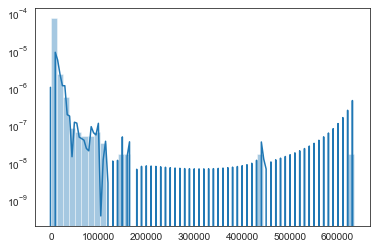

In [111]:
ax=sns.distplot(x);
ax.set_yscale('log')

In [ ]:
conditions = [
    (df['Set'] == 'Z') & (df['Type'] == 'A'),
    (df['Set'] == 'Z') & (df['Type'] == 'B'),
    (df['Type'] == 'B')]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
print(df)

In [152]:
conditions=[
    (df3['amount_yr0'] <= 10),
    (df3['amount_yr0'] > 10) & (df3['amount_yr0'] <= 15),
    (df3['amount_yr0'] > 15) & (df3['amount_yr0'] <= 20),
    (df3['amount_yr0'] > 20) & (df3['amount_yr0'] <= 25),
    (df3['amount_yr0'] > 25) & (df3['amount_yr0'] <= 50),
    (df3['amount_yr0'] > 50) & (df3['amount_yr0'] <= 75),
    (df3['amount_yr0'] > 75) & (df3['amount_yr0'] <= 100),
    (df3['amount_yr0'] > 100) & (df3['amount_yr0'] <= 1000),
    (df3['amount_yr0'] > 1000)
]

choices = ['upto10', 'over10upto15', 'over15upto20', 'over20upto25','over25upto50', 'over50upto75', 'over75upto100', 'over100upto1000', 'over1000']
df3['amount_yr0_groups'] = np.select(conditions, choices, default = 'none')

In [153]:
(df3.amount_yr0_groups.value_counts(normalize=True)*100).reset_index()

,index,amount_yr0_groups
0,over25upto50,26.564073
1,over20upto25,23.725719
2,over100upto1000,12.616754
3,over75upto100,11.789510
4,upto10,11.427060
5,over15upto20,7.165183
6,over50upto75,4.195986
7,over10upto15,1.917805
8,over1000,0.597909


In [50]:
sun_df['cohort_yr2_TF'].to_list()

['TFF',
 'TFF',
 'TFF',
 'TFF',
 'TFT',
 'TFT',
 'TFT',
 'TFT',
 'TTF',
 'TTF',
 'TTF',
 'TTF',
 'TTT',
 'TTT',
 'TTT',
 'TTT']

In [51]:
sun_df['cohort_yr1_TF'].to_list()

['TF',
 'TF',
 'TF',
 'TF',
 'TF',
 'TF',
 'TF',
 'TF',
 'TT',
 'TT',
 'TT',
 'TT',
 'TT',
 'TT',
 'TT',
 'TT']

In [130]:
sun_count['yr4']=['F','T','F','T','F','T','F','T','F','T','F','T','F','T','F','T',]

In [131]:
sun_count

,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,id,perc_cohort_donors,yr0,yr1,yr2,yr3,yr4
0,T,TF,TFF,TFFF,TFFFF,1696680,0.838051,T,F,F,F,F
1,T,TF,TFF,TFFF,TFFFT,6912,0.003414,T,F,F,F,T
2,T,TF,TFF,TFFT,TFFTF,17619,0.008703,T,F,F,T,F
3,T,TF,TFF,TFFT,TFFTT,3108,0.001535,T,F,F,T,T
4,T,TF,TFT,TFTF,TFTFF,44403,0.021932,T,F,T,F,F
5,T,TF,TFT,TFTF,TFTFT,2035,0.001005,T,F,T,F,T
6,T,TF,TFT,TFTT,TFTTF,7626,0.003767,T,F,T,T,F
7,T,TF,TFT,TFTT,TFTTT,2735,0.001351,T,F,T,T,T
8,T,TT,TTF,TTFF,TTFFF,162004,0.080020,T,T,F,F,F
9,T,TT,TTF,TTFF,TTFFT,2994,0.001479,T,T,F,F,T


In [223]:
donations

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_total,count_total,cohort_gift_pattern,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,first_gift_year_year,cohort
0,00000ce845c00cbf0686c992fc369df4,2013-01-01,2,1,1,1,1,0,0,0,...,50.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
1,00002783bc5d108510f3f9666c8b1edd,2016-01-01,2,1,1,1,0,0,0,1,...,99.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2016,cohort16
2,00002d44003ed46b066607c5455a999a,2016-01-01,2,2,2,2,0,0,0,1,...,634.95,11,"0,1,",T,TT,TTF,TTFF,TTFFF,2016,cohort16
3,00002eb25d60a09c318efbd0797bffb5,2015-01-01,4,4,4,4,0,0,1,1,...,160.00,4,"0,1,2,3,",T,TT,TTT,TTTT,TTTTF,2015,cohort15
4,0000300773fe015f870914b42528541b,2017-01-01,2,1,1,1,0,0,0,0,...,50.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2017,cohort17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024549,ffffb91addfb35f11b30c2943f349654,2017-01-01,2,1,1,1,0,0,0,0,...,10.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2017,cohort17
2024550,ffffc2e1225ac40a3ace9b8562115c9b,2016-01-01,2,1,1,1,0,0,0,1,...,75.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2016,cohort16
2024551,ffffd8f0fbfa10b99efe90a5ee13c5df,2017-01-01,2,1,1,1,0,0,0,0,...,50.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2017,cohort17
2024552,ffffdb40226605870f62422b2b420aab,2017-01-01,2,1,1,1,0,0,0,0,...,100.00,1,"0,",T,TF,TFF,TFFF,TFFFF,2017,cohort17


In [224]:
donations.query('amount_2013 > 0')

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,amount_total,count_total,cohort_gift_pattern,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,first_gift_year_year,cohort
0,00000ce845c00cbf0686c992fc369df4,2013-01-01,2,1,1,1,1,0,0,0,...,50.0,1,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
10,00005f52c98eeaf92b2414a352b023a4,2013-01-01,3,2,2,2,1,1,0,0,...,20.0,2,"0,1,",T,TT,TTF,TTFF,TTFFF,2013,cohort13
14,0000889adf4cc958a35daee1f2529b48,2013-01-01,2,1,1,1,1,0,0,0,...,10.0,1,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
18,0000a2175753bc165e53c408589a3bd6,2013-01-01,4,3,3,3,1,1,1,0,...,75.0,3,"0,1,2,",T,TT,TTT,TTTF,TTTFF,2013,cohort13
27,0000c14308c4cb9259a4fe51f692c9ef,2013-01-01,3,2,2,2,2,1,0,0,...,75.0,3,"0,1,",T,TT,TTF,TTFF,TTFFF,2013,cohort13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024519,fffeaaba624f657e461686b9bfc08a5b,2013-01-01,2,1,1,1,1,0,0,0,...,25.0,1,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
2024520,fffeb06eb87c9f8353c3bd4899ee1295,2013-01-01,4,2,1,2,2,0,1,0,...,175.0,3,"0,2,",T,TF,TFT,TFTF,TFTFF,2013,cohort13
2024521,fffebb489764c9b9a48db83125477e26,2013-01-01,2,1,1,1,1,0,0,0,...,15.0,1,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
2024522,fffed4187f3b5f17cb58536f7fac8dee,2013-01-01,2,1,1,1,4,0,0,0,...,27.0,4,"0,",T,TF,TFF,TFFF,TFFFF,2013,cohort13
